# Project: Analyzing Macbeth

## Introduction
For our first day and first data science project, we're going to do some rudimentry analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists, condtionals and dictionaries, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Show mastery of the content covered in this section

### Getting the Data
Here we start by importing a python package and using it to pull the transcript of Macbeth from the project Gutenberg website. We also preview a few details about what is now stored in the variable macbeth; it's a string with 119,846 characters, the first 500 of which are printed below. 

In [12]:
import requests
import re
import string

macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
print(macbeth[:500])

<class 'str'>
119846
﻿***The Project Gutenberg's Etext of Shakespeare's First Folio***
********************The Tragedie of Macbeth*********************

This is our 3rd edition of most of these plays.  See the index.


Copyright laws are changing all over the world, be sure to check
the copyright laws for your country before posting these files!!

Please take a look at the important information in this header.
We encourage you to keep this file on your own disk, keeping an
electronic path open for the nex


### Your Task

Your task is to create a bar graph of the 25 most common words in the Shakespeare's Macbeth.  


A common python programming pattern to counting objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `dictionary.get()` method is very useful in doing this. Read the docstring for the dictionary.get() method and use it along with the pseudocode above to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into a variable 'Macbeth'. Be sure to include a title and appropriate labels for your graph.

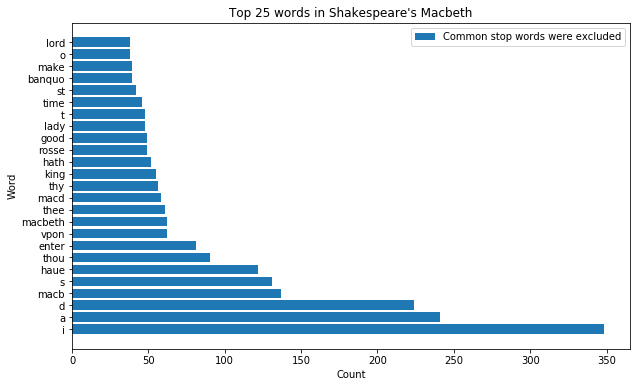

In [102]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

# import stop words
stop_words_df = pd.read_csv("https://algs4.cs.princeton.edu/35applications/stopwords.txt",
                            header = None)
stop_words = list(stop_words_df[0])

# clean the string so that all non alpha numeric characters
# are replaced with empty space
# are then lower cased
# and the string moves past the legal text in the beginning
macbeth_clean = re.sub(r'\W+', ' ', macbeth).lower()
macbeth_clean = macbeth_clean[14813:]
# Pseudo-code Outline
# Split the transcript into words
words = macbeth_clean.split(" ")

# remove stop words from the list of words
words_meaningful = [word for word in words if word not in stop_words]

# Deduplicate words
unique_words = set(words_meaningful)

# Create a dictionary where each key is a unique word and each value is 0
word_count = dict.fromkeys(unique_words, 0)

# Iterate through the text of Macbeth
# Update word counts
# note: each time word appears in the list words_meaningful,
#       add a value of 1 to the value for that specific key
for word in words_meaningful:
    word_count[word] = word_count[word] + 1
    
# transfrom word count to a data frame
word_count_df = pd.DataFrame.from_dict(word_count, orient = "index")
word_count_df = word_count_df.reset_index()
word_count_df = word_count_df.rename(columns = {"index": "word", 0: "n"})
word_count_df = word_count_df.sort_values(by = "n", ascending = False)
word_count_df.head(25)
    
# Create Bar Graph
# Set the figure size in inches
plt.figure(figsize=(10, 6))
plt.barh(y = word_count_df.head(25)["word"], 
         width = word_count_df.head(25)["n"],
         label = "Common stop words were excluded")

# Include descriptive titles and labels
plt.xlabel('Count')
plt.ylabel('Word')

plt.title("Top 25 words in Shakespeare's Macbeth")
plt.legend()

### Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create sub graphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

In [11]:
macbeth[15500:19500]

"ditions.  This is due to the printer's\r\nhabit of setting the type and running off a number of copies and\r\nthen proofing the printed copy and correcting the type and then\r\ncontinuing the printing run.  The proof run wasn't thrown away but\r\nincorporated into the printed copies.  This is just the way it is.\r\nThe text I have used was a composite of more than 30 different\r\nFirst Folio editions' best pages.\r\n\r\nIf you find any scanning errors, out and out typos, punctuation\r\nerrors, or if you disagree with my spelling choices please feel\r\nfree to email me those errors.  I wish to make this the best\r\netext possible.  My email address for right now are haradda@aol.com\r\nand davidr@inconnect.com.  I hope that you enjoy this.\r\n\r\nDavid Reed\r\n\r\nThe Tragedie of Macbeth\r\n\r\nActus Primus. Scoena Prima.\r\n\r\nThunder and Lightning. Enter three Witches.\r\n\r\n  1. When shall we three meet againe?\r\nIn Thunder, Lightning, or in Raine?\r\n  2. When the Hurley-burley's

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an intitial analysis of a classic text!